In [1]:
from VolatilitySurfaceFunctions import *

# Graph style settings

#plt.style.use("Solarize_Light2")
plt.style.use("classic")
#plt.style.use("dark_background")

## Pricing Vanillas Volatility Surface with Heston
### $options\ and\ heston\ parameters:$

In [3]:
CP = OptionType.CALL
S0 = 100.0
r = 0.05
tau = 2.0

K = np.linspace(40,200,25)
K = np.array(K).reshape([len(K),1])

N = 500
L = 5

kappa = 0.1
gamma = 0.1
vbar = 0.1
rho = -0.75
v0 = 0.05

### $Effect\ of\ Gamma\ on\ implied\ volatility$

/home/rolandgrinis.linux/devspace/noa/docs/quant/utils/VolatilitySurfaceFunctions.py:122: RuntimeWarning: divide by zero encountered in true_divide
  d1 = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma, 2.0))


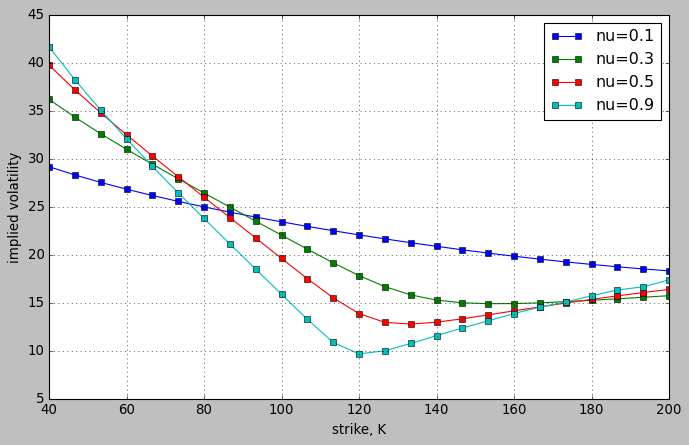

In [4]:
legend = start_plotting(number=1, xLabel='strike, K', yLabel='implied volatility', size=(10,6))

for gammaTemp in (0.1, 0.3, 0.5,0.9):
   # Evaluate the Heston model
   # Compute ChF for the Heston model
   cf = ChFHestonModel(r,tau,kappa,gammaTemp,vbar,v0,rho)

   # The COS method
   valCOS = CallPutOptionPriceCOSMthd(cf, CP, S0, r, tau, K, N, L)

   # Implied volatilities
   IV =np.zeros([len(K),1])
   for idx in range(0,len(K)):
       IV[idx] = ImpliedVolatility(CP,valCOS[idx],K[idx],tau,S0,r)
   plt.plot(K,IV*100.0, "-s")
   legend.append('nu={0}'.format(gammaTemp))
plt.legend(legend)

### $Effect\ of\ kappa\ on\ implied\ volatility $

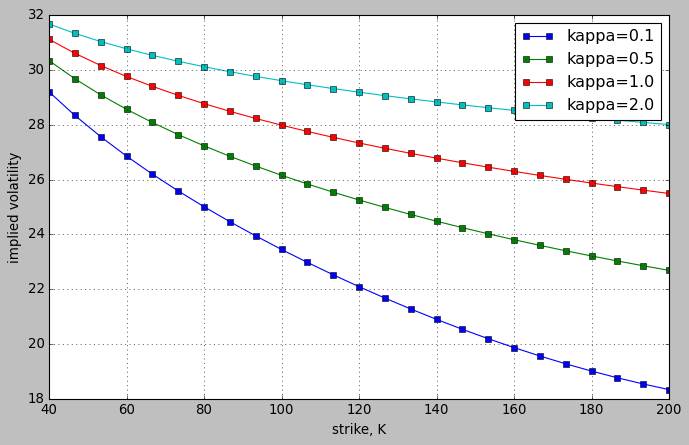

In [5]:
legend = start_plotting(number=2, xLabel='strike, K', yLabel='implied volatility', size=(10,6))

for kappaTemp in (0.1, 0.5, 1.0, 2.0):
    # Evaluate the Heston model
   # Compute ChF for the Heston model
   cf = ChFHestonModel(r,tau,kappaTemp,gamma,vbar,v0,rho)

   # The COS method
   valCOS = CallPutOptionPriceCOSMthd(cf, CP, S0, r, tau, K, N, L)

   # Implied volatilities
   IV =np.zeros([len(K),1])
   for idx in range(0,len(K)):
       IV[idx] = ImpliedVolatility(CP,valCOS[idx],K[idx],tau,S0,r)
   plt.plot(K,IV*100.0, "-s")
   legend.append('kappa={0}'.format(kappaTemp))
plt.legend(legend)

### $Effect\ of\ time\ dependence\ in\ kappa\ on\ implied\ volatility$

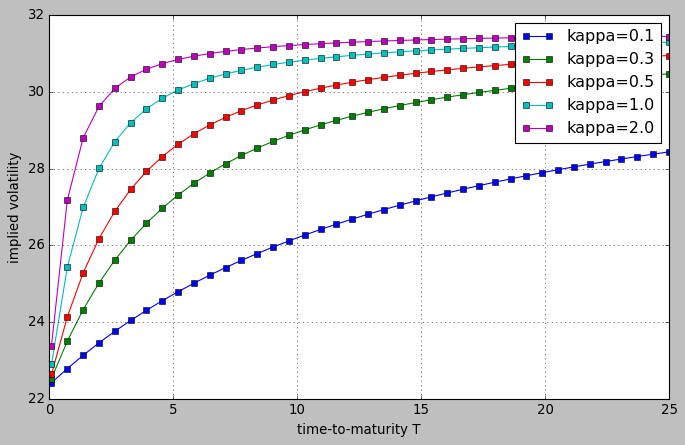

In [7]:
legend = start_plotting(number=3, xLabel='time-to-maturity T', yLabel='implied volatility', size=(10,6))
Ktemp = [S0]
maturityGrid = np.linspace(0.1,25,40)

for kappaTemp in (0.1, 0.3, 0.5, 1.0, 2.0):
    IV =np.zeros([len(maturityGrid),1])
    for idx, t in enumerate(maturityGrid):
        # Evaluate the Heston model
       cf = ChFHestonModel(r,t,kappaTemp,gamma,vbar,v0,rho)

       # The COS method
       valCOS = CallPutOptionPriceCOSMthd(cf, CP, S0, r, t, Ktemp, N, L)

       # Implied volatilities
       IV[idx] = ImpliedVolatility(CP,valCOS,Ktemp[0],t,S0,r)
    #print(IV)
    plt.plot(maturityGrid,IV*100.0, "-s")
    legend.append('kappa={0}'.format(kappaTemp))
plt.legend(legend)

### $Effect\ of\ time\ dependence\ in\ V_0$

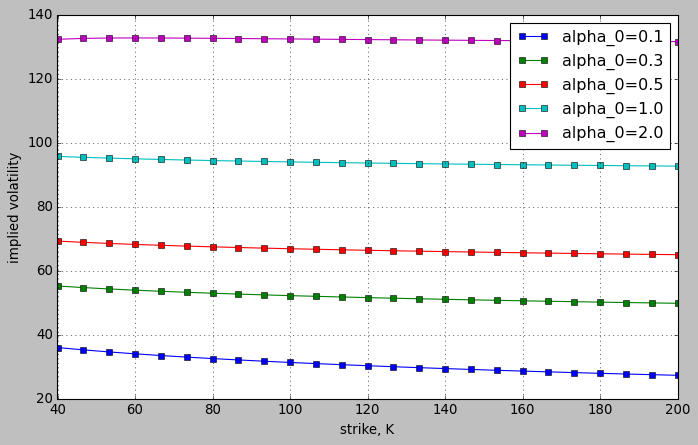

In [13]:
legend = start_plotting(number=4, xLabel='strike, K', yLabel='implied volatility', size=(10,6))
Ktemp = [S0]
maturityGrid = np.linspace(0.1,25,40)

for v0Temp in (0.1, 0.3, 0.5, 1.0, 2.0):
   # Evaluate the Heston model
   # Compute ChF for the Heston model
   cf = ChFHestonModel(r,tau,kappa,gamma,vbar,v0Temp,rho)

   # The COS method
   valCOS = CallPutOptionPriceCOSMthd(cf, CP, S0, r, tau, K, N, L)

   # Implied volatilities
   IV =np.zeros([len(K),1])
   for idx in range(0,len(K)):
       IV[idx] = ImpliedVolatility(CP,valCOS[idx],K[idx],tau,S0,r)
   plt.plot(K,IV*100.0, "-s")
   legend.append('alpha_0={0}'.format(v0Temp))
plt.legend(legend)

### $Effect\ of\ rho$

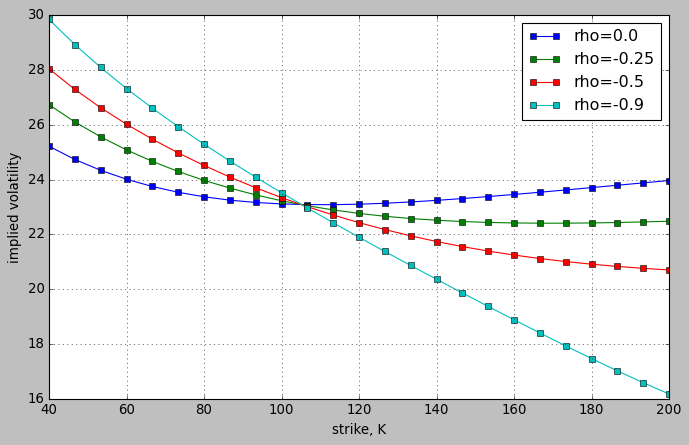

In [14]:
legend = start_plotting(number=5, xLabel='strike, K', yLabel='implied volatility', size=(10,6))

for rhoTemp in (0.0, -0.25, -0.5,  -0.9):
   # Evaluate the Heston model
   # Compute ChF for the Heston model
   cf = ChFHestonModel(r,tau,kappa,gamma,vbar,v0,rhoTemp)

   # The COS method
   valCOS = CallPutOptionPriceCOSMthd(cf, CP, S0, r, tau, K, N, L)

   # Implied volatilities
   IV =np.zeros([len(K),1])
   for idx in range(0,len(K)):
       IV[idx] = ImpliedVolatility(CP,valCOS[idx],K[idx],tau,S0,r)
   plt.plot(K,IV*100.0, "-s")
   #plt.plot(K,valCOS)
   legend.append('rho={0}'.format(rhoTemp))
plt.legend(legend)

### $Effect\ of\ V_{bar}$

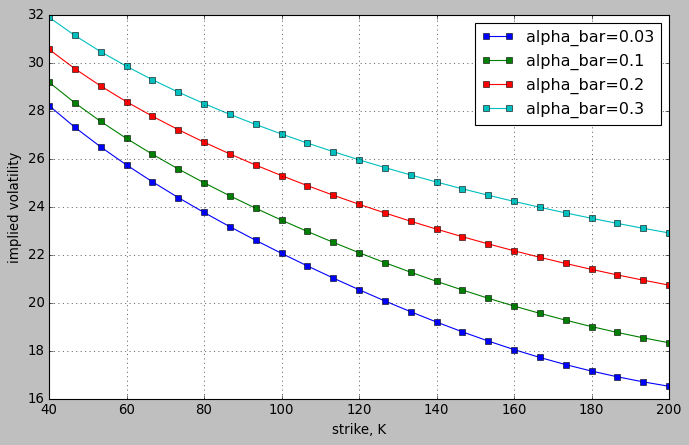

In [10]:
legend = start_plotting(number=6, xLabel='strike, K', yLabel='implied volatility', size=(10,6))

for vbarTemp in (0.03, 0.1, 0.2, 0.3):
   # Evaluate the Heston model
   # Compute ChF for the Heston model
   cf = ChFHestonModel(r,tau,kappa,gamma,vbarTemp,v0,rho)

   # The COS method
   valCOS = CallPutOptionPriceCOSMthd(cf, CP, S0, r, tau, K, N, L)

   # Implied volatilities
   IV =np.zeros([len(K),1])
   for idx in range(0,len(K)):
       IV[idx] = ImpliedVolatility(CP,valCOS[idx],K[idx],tau,S0,r)
   plt.plot(K,IV*100.0, "-s")
   legend.append('alpha_bar={0}'.format(vbarTemp))
plt.legend(legend)

## Simulating Heston Dynamics
### $ Heston\ model\ parameters\ and\ simulation\ constants$

In [17]:
NoOfPaths = 100000
NoOfSteps = 500

gamma = 1.0
kappa = 0.5
vbar = 0.04
rho = -0.9
v0 = 0.04
T = 1.0
S_0 = 100.0
r = 0.1
CP = OptionType.CALL

# First we define a range of strikes and check the convergence
K = np.linspace(0.1,S_0*2.0,30)

### $Comparing\ COS\ method,\ Euler\ and\ simulation\ (AES)$

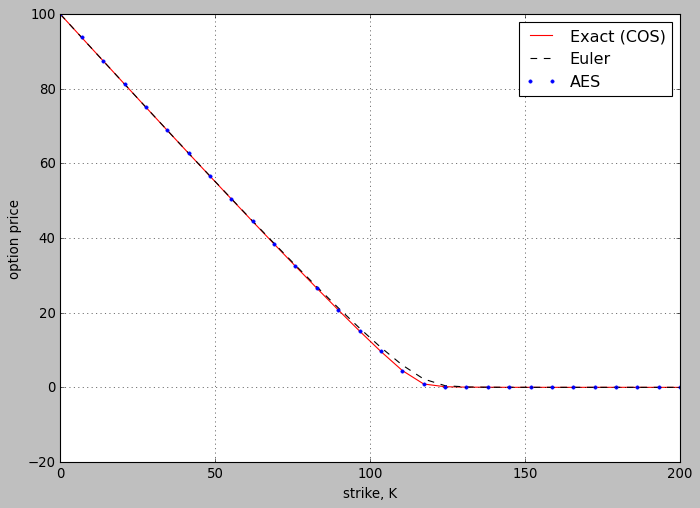

In [18]:
# Exact solution with the COS method
cf = ChFHestonModel(r,T,kappa,gamma,vbar,v0,rho)

# The COS method
optValueExact = CallPutOptionPriceCOSMthd(cf, CP, S_0, r, T, K, 1000, 8)

# Euler simulation
pathsEULER = GeneratePathsHestonEuler(NoOfPaths,NoOfSteps,T,r,S_0,kappa,gamma,rho,vbar,v0)
S_Euler = pathsEULER["S"]

# Almost exact simulation
pathsAES = GeneratePathsHestonAES(NoOfPaths,NoOfSteps,T,r,S_0,kappa,gamma,rho,vbar,v0)
S_AES = pathsAES["S"]

OptPrice_EULER = EUOptionPriceFromMCPathsGeneralized(CP,S_Euler[:,-1],K,T,r)
OptPrice_AES   = EUOptionPriceFromMCPathsGeneralized(CP,S_AES[:,-1],K,T,r)

start_plotting(number=1, xLabel='strike, K', yLabel='option price', size=(10,7))
plt.plot(K,optValueExact,'-r')
plt.plot(K,OptPrice_EULER,'--k')
plt.plot(K,OptPrice_AES,'.b')
plt.legend(['Exact (COS)','Euler','AES'])

### $Here\ we\ will\ analyze\ the\ convergence\ for\ particular\ dt$

In [19]:
dtV = np.array([1.0, 1.0/4.0, 1.0/8.0,1.0/16.0,1.0/32.0,1.0/64.0])
NoOfStepsV = [int(T/x) for x in dtV]

# Specify strike for analysis
K = np.array([100.0])

# Exact
optValueExact = CallPutOptionPriceCOSMthd(cf, CP, S_0, r, T, K, 1000, 8)
errorEuler = np.zeros([len(dtV),1])
errorAES = np.zeros([len(dtV),1])

for (idx,NoOfSteps) in enumerate(NoOfStepsV):
    # Euler
    np.random.seed(3)
    pathsEULER = GeneratePathsHestonEuler(NoOfPaths,NoOfSteps,T,r,S_0,kappa,gamma,rho,vbar,v0)
    S_Euler = pathsEULER["S"]
    OptPriceEULER = EUOptionPriceFromMCPathsGeneralized(CP,S_Euler[:,-1],K,T,r)
    errorEuler[idx] = OptPriceEULER-optValueExact

    # AES
    np.random.seed(3)
    pathsAES = GeneratePathsHestonAES(NoOfPaths,NoOfSteps,T,r,S_0,kappa,gamma,rho,vbar,v0)
    S_AES = pathsAES["S"]
    OptPriceAES   = EUOptionPriceFromMCPathsGeneralized(CP,S_AES[:,-1],K,T,r)
    errorAES[idx] = OptPriceAES-optValueExact

# Print the results
for i in range(0,len(NoOfStepsV)):
    print("Euler Scheme, K ={0}, dt = {1} = {2}".format(K,dtV[i],errorEuler[i]))
for i in range(0,len(NoOfStepsV)):
    print("AES Scheme, K ={0}, dt = {1} = {2}".format(K,dtV[i],errorAES[i]))

Euler Scheme, K =[100.], dt = 1.0 = [0.93251176]
Euler Scheme, K =[100.], dt = 0.25 = [2.38946211]
Euler Scheme, K =[100.], dt = 0.125 = [2.08979595]
Euler Scheme, K =[100.], dt = 0.0625 = [1.77669536]
Euler Scheme, K =[100.], dt = 0.03125 = [1.47235441]
Euler Scheme, K =[100.], dt = 0.015625 = [1.2850271]
AES Scheme, K =[100.], dt = 1.0 = [-1.71052462]
AES Scheme, K =[100.], dt = 0.25 = [-0.41080803]
AES Scheme, K =[100.], dt = 0.125 = [-0.22246847]
AES Scheme, K =[100.], dt = 0.0625 = [-0.11362465]
AES Scheme, K =[100.], dt = 0.03125 = [-0.05576701]
AES Scheme, K =[100.], dt = 0.015625 = [-0.02388839]


## Example of Expected Exposure computation
### $constants:$

In [20]:
NoOfPaths = 2000
NoOfSteps = 1000
CP = OptionTypeSwap.PAYER
lambd = 0.5
eta = 0.03
notional = 10000.0
notional2 = 10000.0
alpha = 0.99
alpha2 = 0.95

### $In\ this\ experiment\ we\ compare\ for\ the\ ZCB\ and\ analytic\ expressions$

Text(0.5, 1.0, 'P(0,T) from Monte Carlo vs. Analytical expression')

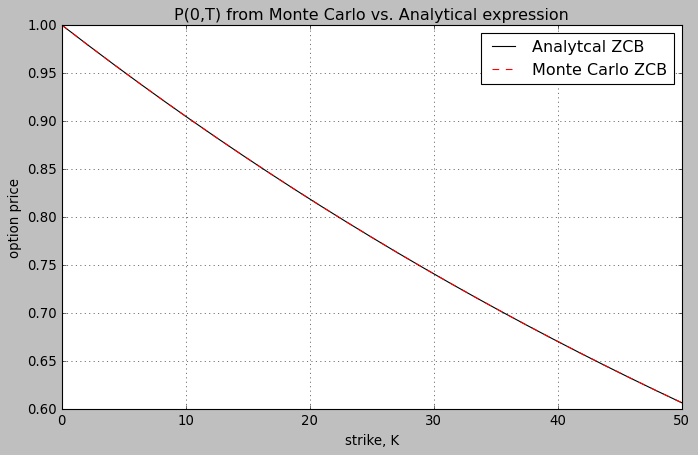

In [21]:
# We define a ZCB curve (obtained from the market)
P0T = lambda T: np.exp(-0.01*T) #np.exp(-0.03*T*T-0.1*T)
r0 = HW_r_0(P0T,lambd,eta)

N = 25
T_end = 50
Tgrid= np.linspace(0,T_end,N)
Exact = np.zeros([N,1])
Proxy= np.zeros ([N,1])

for i,Ti in enumerate(Tgrid):
    Proxy[i] = HW_ZCB(lambd,eta,P0T,0.0,Ti,r0)
    Exact[i] = P0T(Ti)

start_plotting(number=1, xLabel='strike, K', yLabel='option price', size=(10,6))
plt.plot(Tgrid,Exact,'-k')
plt.plot(Tgrid,Proxy,'--r')
plt.legend(["Analytcal ZCB","Monte Carlo ZCB"])
plt.title('P(0,T) from Monte Carlo vs. Analytical expression')

### $Here\ we\ simulate\ the\ exposure\ profiles\ for\ a\ swap,\ using\ the\ HW\ model$
### $swap\ settings:$

In [22]:
K = 0.01  # Strike
Ti = 1.0  # Beginning of the swap
Tm = 10.0 # End date of the swap
n = 10    # Number of payments between Ti and Tm

In [23]:
paths= GeneratePathsHWEuler(NoOfPaths,NoOfSteps,Tm+1.0 ,P0T, lambd, eta)
r = paths["R"]
timeGrid = paths["time"]
dt = timeGrid[1]-timeGrid[0]

### $Here\ we\ compare\ the\ price\ of\ an\ option\ on\ a\ ZCB\ from\ Monte\ Carlo\ and\ analytic\ expression$

In [16]:
M_t = np.zeros([NoOfPaths,NoOfSteps])
for i in range(0,NoOfPaths):
    M_t[i,:] = np.exp(np.cumsum(r[i,0:-1])*dt)

# Portfolio without netting
Value= np.zeros([NoOfPaths,NoOfSteps+1])
E  = np.zeros([NoOfPaths,NoOfSteps+1])
EE = np.zeros([NoOfSteps+1])
PFE = np.zeros([NoOfSteps+1])
PFE2 = np.zeros([NoOfSteps+1])
for (idx, ti) in enumerate(timeGrid[0:-2]):
    V = HW_SwapPrice(CP,notional,K,timeGrid[idx],Ti,Tm,n,r[:,idx],P0T,lambd,eta)
    Value[:,idx] = V / np.squeeze(M_t[:,idx])
    E[:,idx] = np.maximum(V,0.0)
    EE[idx] = np.mean(E[:,idx]/M_t[:,idx])
    PFE[idx] = np.quantile(E[:,idx],alpha)
    PFE2[idx] = np.quantile(E[:,idx],alpha2)

# Portfolio with netting
ValuePort = np.zeros([NoOfPaths,NoOfSteps+1])
EPort  = np.zeros([NoOfPaths,NoOfSteps+1])
EEPort = np.zeros([NoOfSteps+1])
PFEPort = np.zeros([NoOfSteps+1])
for (idx, ti) in enumerate(timeGrid[0:-2]):
    Swap1 = HW_SwapPrice(CP,notional,K,timeGrid[idx],Ti,Tm,n,r[:,idx],P0T,lambd,eta)
    Swap2 = HW_SwapPrice(CP,notional2,0.0,timeGrid[idx],Tm-2.0*(Tm-Ti)/n,Tm,1,r[:,idx],P0T,lambd,eta)

    VPort = Swap1 - Swap2
    ValuePort[:,idx] = VPort / np.squeeze(M_t[:,idx])
    EPort[:,idx] = np.maximum(VPort,0.0)
    EEPort[idx] = np.mean(EPort[:,idx]/M_t[:,idx])
    PFEPort[idx] = np.quantile(EPort[:,idx],alpha)

Text(0.5, 1.0, 'Positive Exposure E(t)')

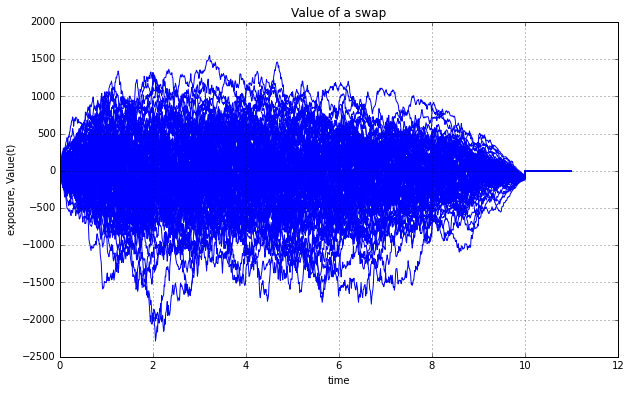

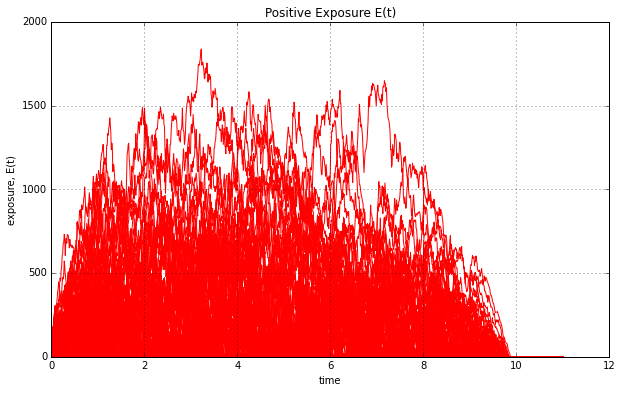

In [17]:
start_plotting(number=2, xLabel='time', yLabel='exposure, Value(t)', size=(10,6))
plt.plot(timeGrid,Value[0:100,:].transpose(),'b')
plt.title('Value of a swap')

start_plotting(number=3, xLabel='time', yLabel='exposure, E(t)', size=(10,6))
plt.plot(timeGrid,E[0:100,:].transpose(),'r')
plt.title('Positive Exposure E(t)')

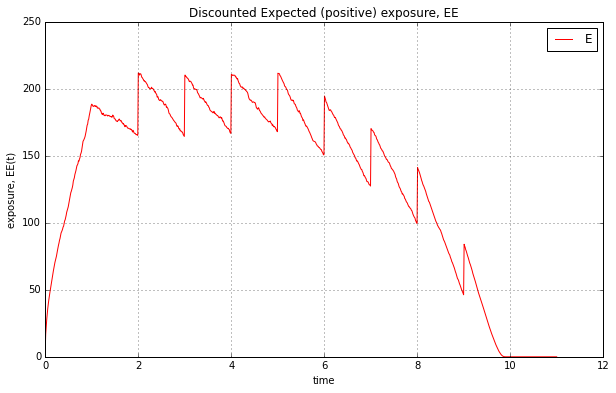

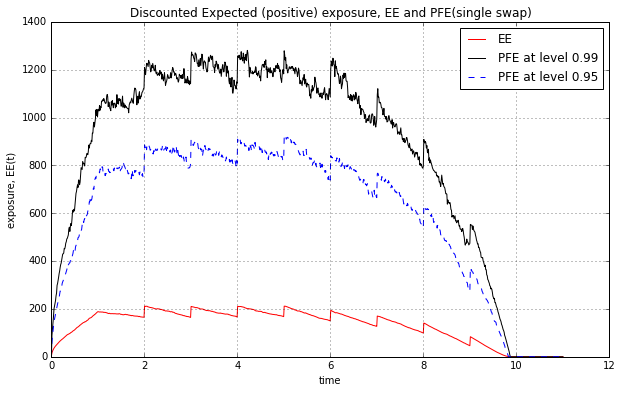

In [18]:
start_plotting(number=4, xLabel='time', yLabel='exposure, EE(t)', size=(10,6))
plt.plot(timeGrid,EE,'r')
plt.title('Discounted Expected (positive) exposure, EE')
plt.legend('EE')

start_plotting(number=5, xLabel='time', yLabel='exposure, EE(t)', size=(10,6))
plt.plot(timeGrid,EE,'r')
plt.plot(timeGrid,PFE,'k')
plt.plot(timeGrid,PFE2,'--b')
plt.title('Discounted Expected (positive) exposure, EE and PFE(single swap)')
plt.legend(['EE', 'PFE at level 0.99', 'PFE at level 0.95'])

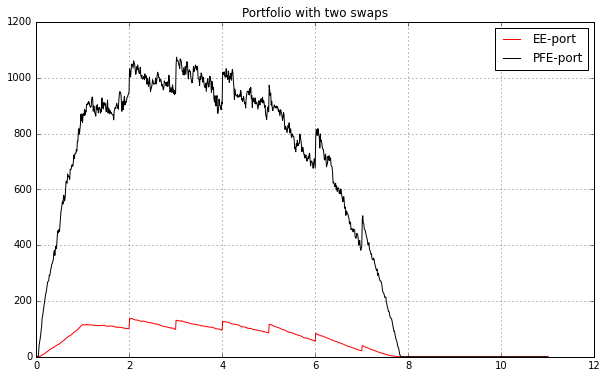

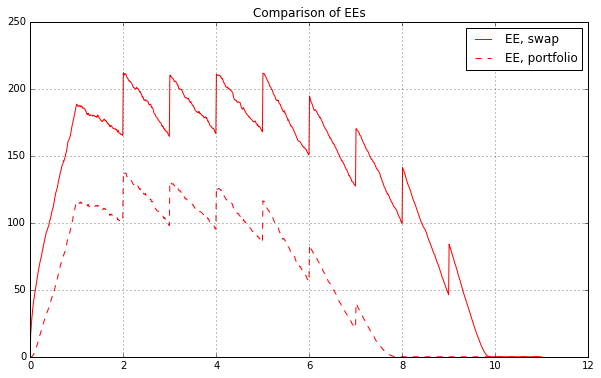

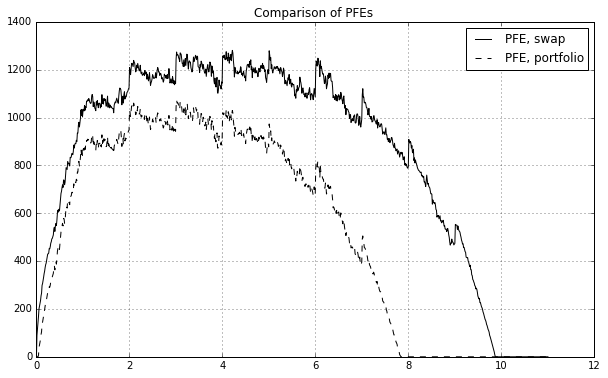

In [19]:
start_plotting(number=6, xLabel='', yLabel='', size=(10,6))
plt.plot(timeGrid,EEPort,'r')
plt.plot(timeGrid,PFEPort,'k')
plt.title('Portfolio with two swaps')
plt.legend(['EE-port','PFE-port'])

start_plotting(number=7, xLabel='', yLabel='', size=(10,6))
plt.plot(timeGrid,EE,'r')
plt.plot(timeGrid,EEPort,'--r')
plt.title('Comparison of EEs')
plt.legend(['EE, swap','EE, portfolio'])

start_plotting(number=8, xLabel='', yLabel='', size=(10,6))
plt.plot(timeGrid,PFE,'k')
plt.plot(timeGrid,PFEPort,'--k')
plt.title('Comparison of PFEs ')
plt.legend(['PFE, swap','PFE, portfolio'])